Pontificia Universidad Católica de Chile <br>
Departamento de Ciencia de la Computación <br>
IIC2433 - Minería de Datos
<br>

<center>
    <h2> Tarea 2 </h2>
    <h1> Clustering </h1>
    <p>
        Profesor Marcelo Mendoza<br>
        Segundo Semestre 2023<br>    
        Fecha de entrega: 15 de septiembre
    </p>
    <br>
</center>

<br>

---

## Indicaciones

Deberás entregar **SOLO** el archivo .ipynb en el buzón respectivo en canvas.

**IMPORTANTE**:
- Se te dará puntaje tanto por código como por la manera en la que respondas las preguntas planteadas. Es decir, si tienes un código perfecto pero este no es explicado o no se responden preguntas asociadas a este, no se tendrá el puntaje completo.
- El notebook debe tener todas las celdas de código ejecutadas. Cualquier notebook que no las tenga no podrá ser corregido.
- El carácter de esta tarea es **INDIVIDUAL**. Cualquier instancia de copia resultará en un 1,1 como nota de curso.

---

## Librerías

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importa aquí las librerías que vayas a utilizar
from sklearn import (preprocessing, decomposition, neighbors, model_selection, metrics, manifold) 
from umap.umap_ import UMAP
from matplotlib import offsetbox

# Parte 1: Carga y Preprocesamiento de Datos (10 pts.)

## 1.1 Carga de Datos

Para esta tarea deberás trabajar con el dataset de Kaggle [dataset](https://www.kaggle.com/datasets/rajyellow46/wine-quality?resource=download).

In [69]:
sample = pd.read_csv('winequalityN.csv')
sample.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## 1.2 Descripción del dataset (2 pts.)

¿Qué representan los atributos del dataset? Descríbelo y menciona características generales.

Dentro del dataSet "WineQuatilyN" se encuentran 12 atributos, los cuales son:
* type: Tipo de vino
* fixed acidity
* volatile acidity	
* citric acid	
* residual sugar	
* chlorides	
* free sulfur dioxide	
* total sulfur dioxide	
* density	
* pH	
* sulphates	
* alcohol	
* quality

El dataset esta relacionado con las variantes de vinos rojas y verdes del "Vinho Verde" portugués. 
Gran parte de las variables describen caracteristicas quimicas segun el tipo de vino. Ademas, tenemos una variable llamada "quality" que representa la calidad del vino segun la escala de 0 a 10. 



## 1.3 Manejo de Variables Cualitativas (2 pts.)

En el set de datos existen columnas con valores no numéricos que deberás manipular antes para poder utilizarlas de buena manera. Para esto utiliza las técnicas vistas en clases

In [70]:
sample
# Como podemos notar, existe la variable type, la cual es categórica ('red', 'white'), por lo que debemos convertirla a numérica
# Para ello, red => 0 y white => 1
sample['type'] = sample['type'].replace('red', 0)
sample['type'] = sample['type'].replace('white', 1)
sample

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Esto nos permite trabajar solo con variables numericas, lo cual es necesario para poder realizar el clustering.

## 1.4 Limpieza del set de datos (4 pts.)

Ahora debes limpiar el set de datos. Para ello deberás emplear técnicas para encontrar valores nulos, outliers, atributos incompletos o características que no sean útiles para el manejo de datos. Recuerda **justificar** tus métodos y decisiones.

In [71]:
# Ahora podemos notar que existen valores nulos dentro del set de datos
sample.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [72]:
# Por lo tanto, eliminaremos en primer lugar estas filas con valores nulos del set de datos
sample_cleaned = sample.dropna()
sample_cleaned.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [73]:
# Ademas, podemos notar que el atributo quality no es tan relevante para predecir el tipo de vino, ya que utilizaremos solamente 
# las caracteristicas esenciales, como pH, densidad, alcohol, etc.
# Por lo tanto, eliminaremos este atributo del set de datos
y = sample_cleaned['quality']
sample_cleaned = sample_cleaned.drop(['quality'], axis=1)

In [75]:
sample_cleaned

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...
6491,0,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [23]:
"""PENDIENTE OUTLIERS"""

'PENDIENTE OUTLIERS'

## 1.5 Normalización de datos (2 pts.)

Normaliza las columnas del set de datos que consideres necesarias. **Justifica** tus decisiones.

Finalmente responde: ¿Por qué es útil normalizar en el caso de un modelo de clustering?

In [76]:
sample_cleaned.describe()
# Normalizaremos las columnas que presentan una alta dispersion de datos, como por ejemplo:
# Residual Sugar, Free Sulfur Dioxide, y Total Sulfur Dioxide.
# Para ello, utilizaremos el metodo de normalizacion MinMaxScaler
columns = ['residual sugar', 'free sulfur dioxide', 'total sulfur dioxide']
scaler = preprocessing.MinMaxScaler()
sample_cleaned[columns] = scaler.fit_transform(sample_cleaned[columns])
sample_cleaned.describe()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,0.753520,7.217755,0.339589,0.318758,0.074294,0.056056,0.102489,0.252752,0.994698,3.218332,0.531150,10.492825
std,0.430995,1.297913,0.164639,0.145252,0.072958,0.035076,0.061663,0.130246,0.003001,0.160650,0.148913,1.193128
min,0.000000,3.800000,0.080000,0.000000,0.000000,0.009000,0.000000,0.000000,0.987110,2.720000,0.220000,8.000000
25%,1.000000,6.400000,0.230000,0.250000,0.018405,0.038000,0.055556,0.163594,0.992330,3.110000,0.430000,9.500000
50%,1.000000,7.000000,0.290000,0.310000,0.036810,0.047000,0.097222,0.258065,0.994890,3.210000,0.510000,10.300000
75%,1.000000,7.700000,0.400000,0.390000,0.115031,0.065000,0.138889,0.345622,0.997000,3.320000,0.600000,11.300000
max,1.000000,15.900000,1.580000,1.660000,1.000000,0.611000,1.000000,1.000000,1.038980,4.010000,2.000000,14.900000


Al normalizar con MinMaxScaler nos permnite determinar que los datos se encuentren dentro de un intervalo filo. Esto es util al momento de
realizar clustering ya que nos permite terner una mejor interpretacion de los futuros resultados al momento de graficarlos.

# Parte 2: t-SNE y UMAP (14 pts.)

## 2.1 t-SNE (1 pts.)

Define t-SNE con 2 componentes. Justifica la elección del parámetro **perplexity**.

In [77]:
X_normalized = sample_cleaned.values
X_normalized.shape
# Tenemos 6497 muestras y 12 caracteristicas. Por lo que podemos decir que el parametro perplexity 
# es de 6497/12 = 541.42, aproximadamente 541. Esto nos permite decir que en promedio cada caracteristica
# deberia tener 541 muestras cercanas a ella. 
tsne_embed = manifold.TSNE(n_components=2, perplexity = 541, n_iter=500, n_iter_without_progress=150, n_jobs=10) 
projection_tsne = tsne_embed.fit_transform(X_normalized)


/usr/local/Caskroom/miniforge/base/envs/dm/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/Caskroom/miniforge/base/envs/dm/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


## 2.2 UMAP (1 pts.)

Define UMAP con 2 componentes. Puedes reducir la cantidad de datos para UMAP si estimas necesario. Justifica la elección de parámetros.

In [78]:
umap_2d = UMAP(n_components = 2, min_dist = 0.1, n_neighbors= 541, n_jobs=8)
projection_umap = umap_2d.fit_transform(X_normalized)
# Escogemos una cantidad minima de distancia como 0.1, ya que a menor valor podemos presentar visualizar una agrupacion de datos mas cercana. 
# Ademas presentamos n_neighbors = 541, como la cantidad de vecinos cercanos, asumiendo que en promedio dada la cantidad de datos totales y las caracteristicas, 
# cada caracteristica deberia tener 541 muestras cercanas a ella.


## 2.3 Visualización en dos dimensiones (6 pts.)

Grafica los embeddings producidos en la sección 2.1 y 2.2. Una vez obtenido los gráficos, responde para cada uno:
* ¿El valor escogido de perplexity puede mejorar? (Solo para t-SNE)
* ¿Crees que se lleve a cabo una buena clusterización?
* ¿Cuántos clusters crees que van a resultar en la mejor clusterización?

In [141]:
def plot_embedding(X, y, title=None):
    _, ax = plt.subplots(figsize=(12, 12))
    X = preprocessing.MinMaxScaler().fit_transform(X)

    for digit in np.unique(y):
        ax.scatter(
            *X[y == digit].T,
            marker=f"${digit}$",
            color=plt.cm.Dark2(digit),
            alpha=0.425,
        )
    shown_images = np.array([[1.0, 1.0]])  # just something big
    for i in range(X.shape[0]):
        # plot every digit on the embedding
        # show an annotation box for a group of digits
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        if np.min(dist) < 20e-3:
            # don't show points that are too close
            continue
        shown_images = np.concatenate([shown_images, [X[i]]], axis=0)
        # imagebox = offsetbox.AnnotationBbox(
        #     # Do offsetbox of the digit value (y[i]) at position X[i] on the embedding space
        #     offsetbox.OffsetImage(X_normalized, zoom=0.5),
        #     X[i],
        # )
        # imagebox.set()
        # ax.add_artist(imagebox)


    ax.set_title(title)
    ax.axis("off")

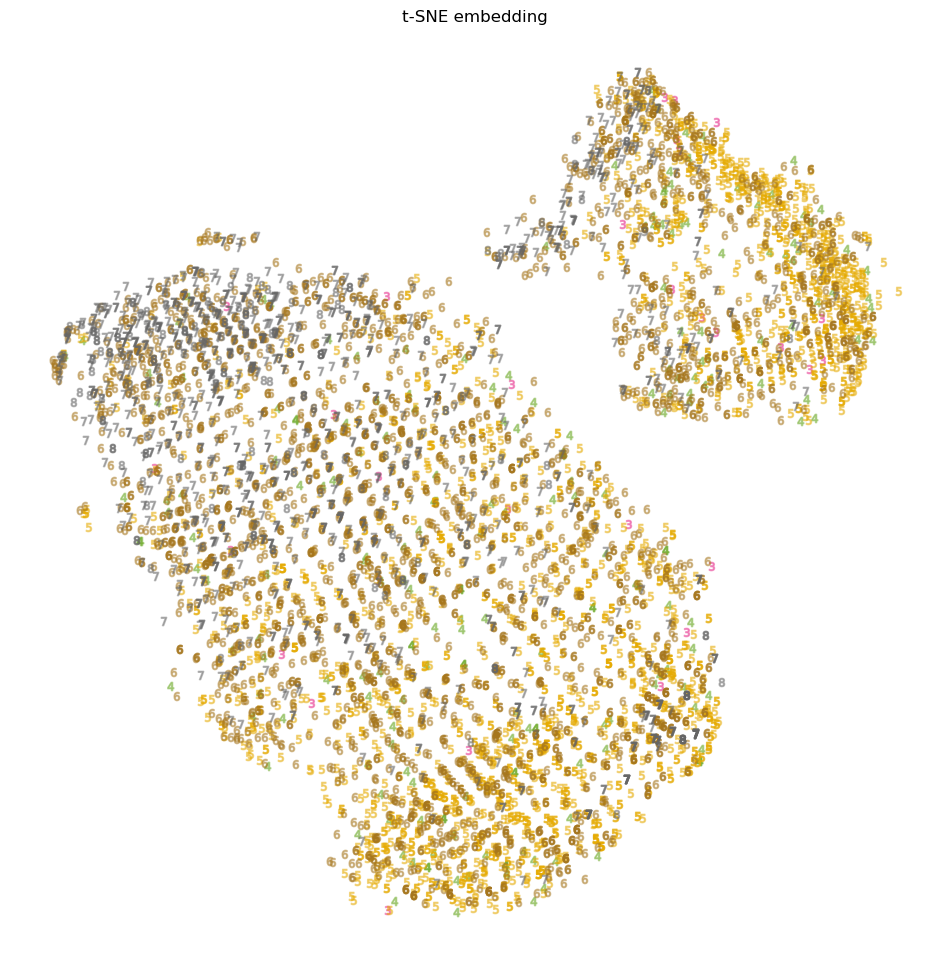

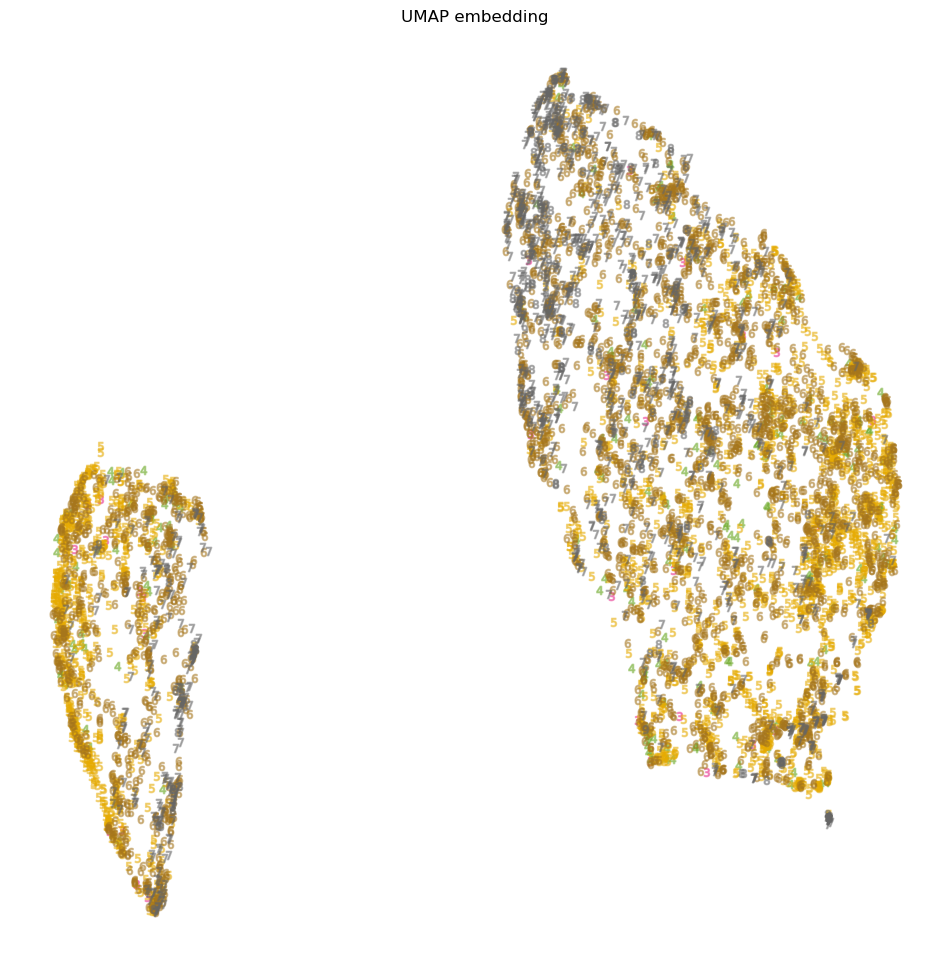

In [142]:
plot_embedding(projection_tsne, y, "t-SNE embedding")
plot_embedding(projection_umap, y, "UMAP embedding")


## 2.4 Análisis del algoritmo t-SNE (3 pts.)

Responde: ¿Crees que observar el gráfico de t-SNE te da una idea acertada de cómo es la estructura del set de datos en más dimensiones? ¿Qué características de t-SNE permiten esto?

## 2.5 Análisis del algoritmo UMAP (3 pts.)

Responde: ¿Crees que observar el gráfico de UMAP te da una idea acertada de cómo es la estructura del set de datos en más dimensiones? ¿Qué características de UMAP permiten esto?

# Parte 3: K-Means (18 pts.)

En esta sección debes trabajar con los 2 modelos obtenidos en la sección anterior, y crear un nuevo modelo de PCA que retenga el 95% de varianza. Para cada uno deberas:

* Correr K-Means para valores `k` en el rango `[2, 3, 4, 5, 6, 7]` **(0.5 pt.)**
* Realizar un gráfico ELBOW **(1.5 pts.)**
* Obtener el Silhoutte Score para distintos números de cluster y graficar **(1.5 pts.)**  
* Determinar el número de clusters óptimo **(0.5 pt.)**
* ¿La cantidad de clusters que esperabas coincide con la calculada? ¿Por qué? **(2 pts.)**

**Nota:** Son 6 puntos por modelo, y los puntos se distribuyen como se muestra arriba.


# Parte 4: Graficar y Analizar (18 pts.)

En esta sección se espera que grafiques las clusterizaciones producidas por K-Means. Para ello, considera lo siguiente:
* Se debe utilizar t-SNE y UMAP para visualizar las clusterizaciones en dos dimensiones. (Decide cual de las dos utilizar para mostrar los resultados de PCA) **(3 pts. por cada gráfico)**
* Se recomienda asociar cada punto a un cluster mediante un color distintivo. Para ello se recomienda investigar de `matplotlib.cm`.

Finalmente, analiza los tres gráficos. Compáralos y describe en qué medida se diferencian. Relaciona esto con los modelos que utilizaste. **(9 pts.)**